# A brief history of the tidyverse

Hadley Wickham  
January 20, 2025

In [ ]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

## Introduction

Unlike our universe, the [tidyverse](https://www.tidyverse.org/) did not start with a big bang. It started with a gradual accumulation of packages that eventually snowballed into the identification and naming of the tidyverse. In this paper, I’ll explore the process of its creation, starting from the influences that lead to the first packages of the proto-tidyverse, leading in to the early years of the tidyverse. I’ll then discuss the defining features of tidyverse, along with the contributions that I’m most proud off. The tidyverse is a colloborative project so I’ll discuss the tidyverse team at Posit and the important role played by the broader community. I’ll finish off with some thoughts about the current maturity of the tidyverse and where we might be heading next.

This article summarises almost 20 years of package development encompassing over 500 releases of 26 packages, as summarised by <a href="#fig-tidyverse-timeline" class="quarto-xref">Figure 1</a>. That means this write-up is necessarily abbreviated and when coupled with my fallible memory, that means I’ve almost certainly forgotton some important details. If you spot any important omissions, please [let me know](https://github.com/hadley/25-tidyverse-history/issues) so I can fix it!

In [ ]:
package_release |>
  filter(type %in% c("core", "tidyverse")) |>
  mutate(release = if_else(release == "first", "major", release)) |>
  count(year, release) |>
  tidyr::complete(year, release, fill = list(n = 0)) |>
  ggplot(aes(year, n, colour = release)) +
  geom_line(linewidth = 1) +
  labs(
    title = "tidyverse package releases",
    x = NULL,
    y = "Number of releases",
    colour = "Release type"
  ) +
  theme(legend.position = "bottom")

## Before the tidyverse

While the tidyverse was named in 2016, most of the packages that make it up were created earlier, as summarised by <a href="#fig-first-releases" class="quarto-xref">Figure 2</a>. In this section, I’ll explores how the tidyverse came to be, a journey that’s inextricably tied to to the course of my career. I’ll begin the story with a couple of formative experiences growing up then continue on to my PhD where I created reshape and ggplot. Next we’ll move onto my professional career, first at Rice University where teaching forced my ideas to become more concrete and acessible, and then to RStudio (now Posit) where I was given the freedom and resources to dive deep in package development.

In [ ]:
package_release |>
  mutate(
    is_first = release == "first",
    package = ifelse(type == "core", paste0("**", package, "**"), package)
  ) |>
  filter(
    type %in% c("core", "tidyverse", "precursor"),
    package != "tidyverse"
  ) |>
  arrange(desc(release)) |>
  ggplot(aes(date, forcats::fct_reorder(package, date, min))) +
  geom_point(aes(colour = is_first)) +
  geom_vline(xintercept = as.Date("2016-09-15")) +
  scale_colour_manual(values = c("grey80", "black")) +
  scale_x_date(date_breaks = "2 years", date_labels = "%Y") +
  labs(x = NULL, y = NULL) +
  theme(
    legend.position = "none",
    axis.text.y.left = ggtext::element_markdown()
  )

### Growing up

Growing up, I was very lucky to have access to computers from a very early age, thanks to my dad[1], and this lead to an general interest in computers and programming. Thanks to my dad’s professional work with databases, I had conversations about relational database design and Codd’s third normal form much in earlier in life than usual. That lead to a lot of playing around in Microsoft Access, a desktop DBMS, and an eventual part-time job developing databases. This work was invaluable when I later came to wrestle with the data needed to fit statistical models.

From my mum I learned that you don’t need to ask permission to do good in the world[2]. This meant that when I encountered data analysis problems that I thought I could solve, I felt empowered to not only solve them, but share my solutions with the world. From both my parents I gained the convinction those with abundant resources have a moral obligation to help those with less, which made it natural for those solutions to enter the world as open source software.

The final formative experience prior to my PhD was my undergraduate statistics degree at the University of Auckland, the birthplace of R. Unsurprisingly, many of my courses were taught using R, which meant that I started using R in 2003, at version 1.6.2. It’s fun to look back at my earliest R code: the files use a `.txt` extension, mix `=` and `<-` for assignment, and use very inconsistent spacing.

### PhD (2004-2008)

My undergraduate left me with a desire to learn more about statistics, and since my Dad had done his PhD at Cornell University, it seemed quite reasonable to look to the US to do my PhD too. This lead me to Iowa State University (ISU) and my major advisors Dianne Cook and Heike Hofmann.

At ISU, I was lucky enough to get a consulting assistanceship with the Agricultural Experiment Station, where I helped PhD students in other departments do their analyses. This work lead me to face two challenges that remain with me today:

-   The hardest part of collaborative data analysis is not finding the correct statistical model, but getting the data into that a form that you can easily work with. This challenge lead to the creation of the [reshape packge](http://had.co.nz/reshape/) which made it easier to work with a variety of input datasets by first converting to a “molten” form which you could then “cast” into the desired form[3].

-   I often found it hard to translate the plots that I pictured in my head into code using the existing toolkits of base or lattice ([Sarkar 2008](#ref-lattice)) graphics. At the same time I was reading the The Grammar of Graphics ([Wilkinson 2012](#ref-grammar-of-graphics)) and found its theory of visualization to be very compelling. But the only implementation available at the time was very expensive, so I decided I’d have a go at creating my own in R. That lead to ggplot and later ggplot2. During my time at ISU, I was very lucky to get the opportunity to meet Lee Wilkinson who was tremendously supportive on my work[4].

This work wouldn’t have been possible without Di and Heike, who let me work on what **I** thought was most important[5], regardless of whether or not it fit the mold of a traditional statistics PhD. They also provided aircover for me when I let my disdain for the utility of theoretical statistics shine a little too clearly, causing difficulties with the completion of the more traditional components of my PhD. My work at ISU culminated in my thesis “[Practical tools for exploring data and models](http://had.co.nz/thesis/practical-tools-hadley-wickham.pdf)”, a write-up of the collection of R packages I had begun to amass and the ideas that underpinned them.

### Rice University (2008-2012)

After graduating from ISU, I got a job at Rice University. Here my most formative experience was teaching [Stat405](http://stat405.had.co.nz), “Introduction to Data Analysis”[6]. I taught this class four times (2009-2012) and found the experience of repeatedly teaching the same topics to new students to be extremely useful. It helped me to discover topics that students found hard to understand and tools that they found hard to use, and I could see the impact of my improvements to teaching and tooling from year-to-year. This lead to the creation of the [stringr](https://stringr.tidyverse.org) (2009) and [lubridate](https://lubridate.tidyverse.org) (2010, with Garrett Grolemund) packages as I discovered that many students struggled to master the special cases of string and date-time manipulation in base R. It also catalysed my work on tidy data and group-wise manipulation that lead to the tidyr and dplyr packages which I discuss in the next section.

Throughout this time, the popularity of ggplot2 continued to rise, and I manage to carve out time to work on it, despite it not being considered research and thus not valued by my department. But my interactions with the community kept me motivated and continued to reinforce my belief that open source software development was valuable because it empowered others to do better data analysis. During this time I started work with Garrett Grolemund, as my PhD student, and Winston Chang, as a contractor. Most importantly for the the tidyverse, Garrett developed lubridate ([Grolemund and Wickham 2011](#ref-lubridate)) and Winston worked on ggplot2, implementing new geoms like `geom_dotplot()` and `geom_violin()`, important infrastructure like the theme system and the underlying OOP system. I’m lucky to still count Garret and Winston as my colleagues at Posit.

During my time at Rice I had very little success with grants. I had a hard time packaging my work in a way that the people reviewing statistics grants at the NSF could make sense of, despite my absolute conviction that this work with important. I was fortunate to get a couple of small grants from BD and Google to work on plyr, reshape, and ggplot2, but these were nowhere near the amount of money I was expected to bring in. A paragraph from a final report to BD highlights my thinking at the time:

> The generous support of BD has allowed me to implement many performance improvements to plyr, reshape and ggplot2, and begin work on the next generation of interactive graphics. Without such support, it is difficult for me to spend time on these projects as they do not directly contribute to my research portfolio. Your support not only gives me the financial backing to pursue these important optimisations, but also sends a strong signal to the statistics community that this work is important.

I also worked tooling for package development, despite it similarly lacking any research merit. Because I was developing quite a few packages, it made sense to invest in tooling that helped me develop more reliable software in less time. This lead to the creation of the testthat (2009) and devtools (2011) packages, and taking over maintenance of the roxygen2 package[7] (2011).

### RStudio (2012-)

In 2012, I left Rice for RStudio (now Posit), moving to a position where the practice of software engineering was valued and I no longer needed to produce papers or find grant money. This gave me the time and freedom to learn C++, an important tool that I was missing for writing high performance code. I was very lucky to be mentored by JJ Allaire which allowed my C++ skills to grow rapidly. Overall, my first few years at RStudio lead to an explosion of new packages because I had both the time to work on what I thought was important and the ability to invest in programming skills that were not valued in academia.

The most important new package was dplyr. dplyr grew from my dissatisfation using the plyr package to solve various grouped data frame problems. These problems tended to be simple to explain but hard to solve using existing tools. For example, you have the babynames dataset and want to figure out the rank of each name, within each combination of sex and year. Solving that problem required `plyr::ddply()` so called because the input is a data frame and we want the output also to be a data frame. This function has three arguments: the input data frame to work, how to split it up (by year and sex variables) and what we want to do to each piece (mutate it).

[1] You can read more about him and how he shaped my life at <https://tidydesign.substack.com/p/my-dad-brian-wickham>.

[2] She also taught me to bake, which I continue to get great enjoyment from, but I don’t think that has influenced the development of the tidyverse, except for some fun purrr examples

[3] Compared to today’s equivalent, tidyr, reshape includes a lot of tools for working with high-dimensional arrays. I was initially interested in arrays because they are rather elegant and can be much more memory efficient than data frames. But they only work well for highly crossed experimental designs and I found them very hard to explain to others. My work with arrays largely fell by the wayside once I decided that it was better to standardise on data frames.

[4] Lee also made a throw away comment about reshaping that lead to a vastly more performative implementation that become the heart of reshape2.

[5] I was supposed to be working on ggobi, a tool for interactively exploring high-dimensional data. This lead to a number of R packages including clusterfly and classify that used the rggobi package to get your data from R and into ggobi. I still think this work is incredibly useful and empowering but somehow interactive graphics has failed to have the impact on statistical practice that it really should.

[6] If I taught this today, I’d call it an Introduction to Data *Science*.

[7] roxygen2 was developed by Peter Danenberg and Manuel J. A. Eugster for a Google Summer of Code project in 2008.

In [ ]:
library(babynames)

ranked <- plyr::ddply(babynames, c("year", "sex"), function(df) {
  plyr::mutate(df, rank = rank(-n))
})
head(ranked, 10)

   year sex      name    n       prop rank
1  1880   F      Mary 7065 0.07238359    1
2  1880   F      Anna 2604 0.02667896    2
3  1880   F      Emma 2003 0.02052149    3
4  1880   F Elizabeth 1939 0.01986579    4
5  1880   F    Minnie 1746 0.01788843    5
6  1880   F  Margaret 1578 0.01616720    6
7  1880   F       Ida 1472 0.01508119    7
8  1880   F     Alice 1414 0.01448696    8
9  1880   F    Bertha 1320 0.01352390    9
10 1880   F     Sarah 1288 0.01319605   10

This code is unappealing for new users because it requires that you not only understand functions but also the basics of functional programming. This means that if you’re teaching R, you can’t teach it until later in the semester, even though the underlying task is straight forward and is something you want to be able to do early in your data analysis journey.

The creation of dplyr allowed you to instead write code like this:

In [ ]:
library(dplyr)

babynames |>
  group_by(year, sex) |>
  mutate(rank = rank(desc(n)))

# A tibble: 1,924,665 × 6
# Groups:   year, sex [276]
    year sex   name          n   prop  rank
   <dbl> <chr> <chr>     <int>  <dbl> <dbl>
 1  1880 F     Mary       7065 0.0724     1
 2  1880 F     Anna       2604 0.0267     2
 3  1880 F     Emma       2003 0.0205     3
 4  1880 F     Elizabeth  1939 0.0199     4
 5  1880 F     Minnie     1746 0.0179     5
 6  1880 F     Margaret   1578 0.0162     6
 7  1880 F     Ida        1472 0.0151     7
 8  1880 F     Alice      1414 0.0145     8
 9  1880 F     Bertha     1320 0.0135     9
10  1880 F     Sarah      1288 0.0132    10
# ℹ 1,924,655 more rows

The design of dplyr was centered around verbs like `filter()`, `mutate()`, and `summarise()`, with names that evoked their desired purpose. Each verb did one thing well, and was designed to compose with other verbs in order to solve complex problems. While use dplyr does require learning some big new ideas, I found that students could learn them much more easily than functional programming.

The early years of dplyr benefited tremendously from the work of Romain François (initially as an RStudio contractor and then later as an employee). Thanks to his C++ expertise, dplyr also ended up being much faster than plyr, ensuring that there was an immediate payoff to learning it[1]. One of the particularly nice features of dplyr is that you can use the same syntax with different backends. For example, you can use dbplyr (2017) to with work SQL database where instead of running R code, the package generates SQL code that is run in the database.

[1] It was unfortunate that I wasn’t aware of data.table at this time, or I would have had much higher expectations for performance. I also inadvertently damaged my relationship with that commmunity by failing to understand what drove them and why dplyr was seen as such a threat. Fortunately in the years since I have worked to repair those relationships, particularly thanks to help and advice from Tareef Kawaf in 2019. I’m now proud to say that [dtplyr](https://dtplyr.tidyverse.org), the dplyr backend that uses data.table, recieved a [data.table seal of approval](https://rdatatable-community.github.io/The-Raft/posts/2024-08-01-seal_of_approval-dtplyr/index.html).

During this time I also started thinking about how data gets into R. This initially lead to work with R’s database ecosystem, taking of over maintenance of the DBI and RSQLite package from Seth Falcon (2013), creating bigrquery (2015) to make it possible to get data from Google’s BigQuery database, and forking RPostgres from the unmaintained RPostgresSQL (2015). This work was done in concert with Kirill Müller, who now maintains much of the database ecosystem thanks to funding from the R Consortium. After databases, I hit up a range of other data sources such as web scraping (rvest, 2014), Excel (readxl, 2015), rectangular text files (readr, 2015), SPSS/SAS/Stata (haven, 2015), and XML (xml2, 2015). None of these packages would have been possible without my new found C++ skills, as they all relied on tight integration with existing C libraries.

Around this time I started to become particularly well known in the R community. This lead to a couple of popular virtual Q&A sessions on [Reddit](https://www.reddit.com/r/dataisbeautiful/comments/3mp9r7/im_hadley_wickham_chief_scientist_at_rstudio_and/) (2015) and [Quora](https://quorasessionwithhadleywickham.quora.com) (2016); these are good places to look if you’re interested in getting a snapshot of my thinking at the time.

## Naming and defining the tidyverse

As the collection of packages I had developed grew, the community needed some name to refer to them collectively, and many people started calling them the “Hadleyverse”[1]. This name was unappealing to me because using a portmanteau of my name and “universe” felt overweeningly arrogant, so I started brainstorming an “official” name that I could live with, including the sleekverse, the dapperverse, and the deftverse[2]. In hindsight, given the success of tidy data, calling it the tidyverse seems obvious.

I announced this name to the world at my keynote at useR on June 29, 2016. A few months later in September, I released the [tidyverse package](https://posit.co/blog/tidyverse-1-0-0/). This package had two main goals:

-   To make it easy to install all packages in the tidyverse with a single line of code, `install.packages("tidyverse")` so that folks could easily get a “batteries included” data science environment.

-   To make it easy to load the most common packages, so that you could type `library(tidyverse)` instead of loading packages one by one. The initial release loaded ggplot2, dplyr, tidyr, readr, purrr, and tibble automatically, then version 1.2.0 (September 2017) added forcats and stringr, and version 2.0.0 (March 2023) added lubridate[3].

Naming the tidyverse created some bigger questions: What exactly is the tidyverse? What are the unifying principles that underlie the packages in the tidyverse? In my useR talk I cited three unifying principles:

-   Uniform data structures
-   Uniform APIs
-   Support referential transparency

The first two principles are straightforward: it’s easier to learn a new tool if it uses data structures and interfaces thta you’re already familiar with. But what does referential transparency mean? That’s a call to the principles of tidy evaluation, which we’ll come back to in the next section.

I repeated my introduction to the tidyverse talk a few times and by December 2016 I’d further refined the core principles to these four:

-   Share data structures (i.e. tidy tibbles).
-   Compose simple pieces (i.e. use the pipe).
-   Embrace functional programming (instead of for loops).
-   Write for humans.

The final bullet was particularly motivated by this quote:

> Programs must be written for people to read, and only incidentally for machines to execute.  
> — Hal Abelson

Since that time I’ve continued to refine my description of what it means to be part of the tidyverse and you can see my latest iteration in [Tidy design principles](https://design.tidyverse.org/unifying.html). At the time of writing this paper, the four principles of the tidyverse were:

-   It is **human centered**, i.e. the tidyverse is designed specifically to support the activities of a human data analyst.

-   It is **consistent**, so that what you learn about one function or package can be applied to another, and the number of special cases that you need to remember is as small as possible.

-   It is **composable**, allowing you to solve complex problems by breaking them down into small pieces, supporting a rapid cycle of exploratory iteration to find the best solution.

-   It is **inclusive**, because the tidyverse is not just the collection of packages, but it is also the community of people who use them.

## Key innovations

In this section, I’ll discuss five specific innovations strongly associated with the tidyverse that I am particularly proud of: tidy data, tibbles, the pipe, tidy evaluation, and hex stickers.

### Tidy data

I’ve always had a very strong sense that there’s a “right” way to organise your data, a way that would make the rest of your analysis much easier. And when looking at a dataset I could usually identify what form would be the most productive. But I had a time explaining what I was doing to others, and experienced numerous failures when trying to teach my approach. But eventually I figured out the three principles of tidy data[4] :

-   Each variable goes in a column.
-   Each observation goes in a row.
-   Each value goes in a cell.

In hindsight, it seems hard to understand why it took so long to describe these principles, but Wickham ([2014](#ref-tidy-data)) is one of the rare articles in the statistics literature that actually describes how you should structure your datasets. I find it interesting that this definition seems to work for a wide variety of people, even without a precise definition of variable and observation.

[1] e.g. <https://github.com/imanuelcostigan/hadleyverse>

[2] In June 2016, Winston Chang and I brainstormed a bunch of ideas in slack: shipshape, trim, spruce, dapper, natty, joy-sparking, spiffy, choice, debonair, suave, virile, civil, gallant, pulchritudinous, graceful, well-tempered, deft, fastidious, slick, crack, mellow, mannerly, unctuous, tolerable, glib, fluent, affable, agreeable, stout, dashing, snazzy, boffo, raffish, rakish, swashbuckling, nifty, phat, dandy, sleek.

[3] We had wanted to add lubridate to the core packages along with forcats and stringr, but there were a couple of function names that caused conflicts. The process of eliminating these functions without unduly affecting user code took a further five years.

[4] This is certainly not the only data stucture you might ever want to use, but it’s extremely useful to have a organising structure that you can rely on for the majority of your work. It’s a great default, even if you might need other forms for specialised purposes.

The definition of tidy data was tightly paired with tools designed to get data into a tidy form. The tidy data paper was paired with the tidyr package, which initially provided the `gather()` and `spread()` functions. Unfortunately many people (including me!) had a hard time remembering which was which and what their arguments did. Additionally, their design wasn’t quite flexible enough to handle all the problems which we later discovered in practice. In [tidyr 1.0.0](https://www.tidyverse.org/blog/2019/09/tidyr-1-0-0/) (2019), we resolved many of these problems by introducing the new`pivot_longer()` and `pivot_wider()` functions[1].

tidyr 1.0.0 also expanded the scope of the package to encompass “rectangling”, a new term for converting hierarchical data into tidy rectangles. At the time, this was becoming increasingly important as more data was coming from JSON web APIs, which tended to produce deeply nested data structures. You can learn more about the problem and the solutions that tidyr provides in the tidyr [rectangling vignette](https://tidyr.tidyverse.org/articles/rectangle.html).

[1] The names of these functions were informed functions was informed by some casual user research performed by asking my twitter followers a couple of questions. I received ~2,600 responses which you can learn read more about on <https://github.com/hadley/table-shapes>.

### tibbles

Tidy data provides a theoretical framework to productively organise your data. You also need practical data structures that make it easier to work with tidy data. To this end, I created the tibble as an extension of the base R data.frame class. The goal of the tibble was to solve a number of individually small issuses that I felt added needless friction:

-   Data frames often flood your console with output when working with datasets containing many rows or many columns. In older versions of R, you couldn’t even cancel this rendering, making it easy to lock yourself out of your console when working with bigger datasets. tibbles only print a small number of rows and only the columns that fit on one screen. You can always explicitly request more data, but the defaults ensure that your analysis workflow is nimble.

-   When teaching, I found that students didn’t have a good sense of the type of variable stored in each column, and even I sometimes found myself confused about whether a column was a date, a string, or factor. To avoid this problem, tibbles show (abbreviated) variable types underneath the column names.

-   In the unfortunate case you have `data.frame(x = c(NA, "<NA>"))`, there’s no way to distinguish the two values from the printed output. Tibbles use a side-channel, colour, to ensure that there’s no way to confuse a missing value with a string that has the same printed representation.

-   In 2016, I was exploring ways of storing richer data structures inside of data frames, including columns that were themselves data frames, as well as columns that were lists of data frames. While these column types are technically supported by the base data frame, their printing is sufficiently confusing to make them hard to use. Tibbles strive to represent these more complex data types in an readable way.

tibbles also resolve a couple of gotchas with subsetting data frames that make it easy to make silent errors in package code. For example, if `df` is a data.frame, then:

-   `df[, cols]` might return a vector or a data frame, depending on how many columns `cols` selects.

-   `df$x` uses partial matching, so that if column `x`doesn’t exist but column `xyz` does, it will silently return `df$xyz`.

Neither of these problems occur if `df` is a tibble because `[` will always returns another tibble and `$` will never perform partial matching (and will complain if `x` does not exist). This why I jokingly say that tibbles are lazy and surly versions of data frames.

tibbles started life in dplyr, originally just called `tbl_df` with no suggestion as how to pronounce this work that only contains consonants. [Kevin Ushey](https://x.com/kevin_ushey/status/514659005621219329) proposed pronouncing them as tibble-diffs in 2014, and the tibble bit stuck. As the utility and complexity of tibbles expanded, they need more space to grow and were [extracted into their own package](https://posit.co/blog/tibble-1-0-0/) in 2016.

tibbles were a much more contentious data structure than I had anticipated. They broke code in older packages and my strong opinions about the formatting of significant digits caused some consternation. That contention seems to have mostly died down now, but today I am much more cautious about introducing new data structures. I now believe that new data structures are fundamentally much more costly than introdcing new functions or packages, and should be kept to the bare minimum.

### The pipe

> No matter how complex and polished the individual operations are, it is often the quality of the glue that most directly determines the power of the system.
>
> — Hal Abelson

The pipe quickly became one of the defining features of tidyverse code. It allows you to rewrite function composition (e.g. `f(g(x)))`) as a linear sequence of transformations (e.g. `x |> f() |> g()`), which tends to make common data analysis programming patterns much easier to read.

My first attempt at the pipe was implemented in dplyr in Oct 2013 and called `%.%`. When [I announced dplyr](https://rstudioblog.wordpress.com/2014/01/17/introducing-dplyr/) in January 2014, I learned that Stefan Milton Bache had been thinking along similar lines and had created the magrittr package. It used `%>%` instead of `%.%`, which was easier to type since you can hold down the shift button the whole time[1], and had more comprehensive features. So I quickly pivottoed to use magrittr and deprecate `%.%`. You can learn more about the early history of the pipe in Adolfo Álvarez’s excellent blog post “[Plumbers, chains, and famous painters: The (updated) history of the pipe operator in R](http://adolfoalvarez.cl/blog/2021-09-16-plumbers-chains-and-famous-painters-the-history-of-the-pipe-operator-in-r/)”.

Today, the pipe is available in base R thanks to a collaborative effort. In 2016, Lionel Henry [proposed new syntax](https://lionelhenry.github.io/2016/02/15/ideas-for-an-updated-r-syntax/index.html) and wrote a patch for R, which was presented to the R Core team at the Directions in Statistical Computing Conference in 2017 by Jim Hester. This presentation was received positively, but it took some time for the R Core Team to fully align on the utility of the pipe. The base pipe was added to R in 4.1 (2020) thanks to work by Luke Tierney, and it took a few more iterations to gain the main features of the magrittr pipe with placeholder syntax in R 4.2 and the ability to pipe into subsetting functions in R 4.3. Because R can modify the parser, the base pipe has better syntax, `|>`, with a more visible placeholder, `_`. Since the base pipe is now mature, the tidyverse is gradually moving away from `%>%` towards `|>`, a process that will take several years to complete.

As an interesting historial anecdote, there would have been no need for ggplot2 had I discovered the pipe earlier, as ggplot was based on function composition. I correctly identified that function composition was an unappealing user interface, but if I had discovered the pipe at that time, ggplot could have used it, rather than requiring the switch to `+` in ggplot2. You can [try out ggplot](https://github.com/hadley/ggplot1) if you want, or [learn why ggplot2 can’t switch to the pipe](https://forum.posit.co/t/why-cant-ggplot2-use/4372/7%3E).

### Tidy evaluation

One of the most contentious features of the tidyverse has been the idea of tidy evaluation. The goal of tidy evaluation is to solve a problem introduced by ggplot2 and dplyr’s syntax that allows you to mix variables defined in the current environment with variables defined in some data frame. This makes interactive data analysis much more fluent at the cost of making programming much harder. The need for tidy evaluation is fairly simple to explain. If you have repeated code, you typically want to extract out a function:

[1] The requirement for infix function names to start and end with `%` comes from R, and there’s no avoiding it without patching R itself.

In [ ]:
df1 |>
  group_by(g1) |>
  summarise(mean = mean(a))
df2 |>
  group_by(g2) |>
  summarise(mean = mean(b))
df3 |>
  group_by(g3) |>
  summarise(mean = mean(c))

The naive approach doesn’t work, because dplyr will look for variables literally named `group_var` and `summary_var`:

In [ ]:
grouped_mean <- function(df, group_var, summary_var) {
  df |>
    group_by(group_var) |>
    summarise(mean = mean(summary_var))
}

I believe that we now have some good vocabulary to describe the problem. The root cause of the challenge is that we use the word variable to mean two different things. A **data-variable** is a statistical variable, something that exists inside a data frame, like `g1`, or `a`. An **environment-variable** is a computer science variable, something that exists in (e.g.) the global environment, like `df1` or `df2`. The fundamental challenge of programming with dplyr is that you inside a function you have a data-variable stored inside of a environment variable.

It took us around five years to provide the tools to fully solve the problem. My efforts started in dplyr 0.3.0 (2014) with the introduction of the [lazyeval](https://cran.r-project.org/web/packages/lazyeval) package. There were three pieces:

-   `lazyeval::lazy()` allowed you to capture the data-variable stored inside an environment-variable, producing an explict lazy object.
-   `lazyeval::interp()` allowed you to vary the data-variable used inside an expression.
-   Every dplyr function had a variant that ended in an underscore that took lazy objects.

That lead to a solution that looks like this:

In [ ]:
grouped_mean <- function(df, group_var, summary_var) {
  group_var <- lazyeval::lazy(group_var)
  summary_var <- lazyeval::lazy(summary_var)

  df |>
    group_by_(group_var) |>
    summarise_(mean = lazyeval::interp(~ mean(summary_var), summary_var))
}

This approach worked, but was a bit clunky, introducing a lot of new syntax that you had to learn. Additionally, in July 2016, I learned that the technique that allowed `lazy()` to work would be no longer supported in a future version of R. This lead me back to the drawing board. Fortunately Lionel Henry had recently joined my team and had a bunch of ideas of how to improve the situation. That lead us to a new framework called tidy evaluation (or tidyeval for short), which we introduced to dplyr 0.6.0 (2017).

Tidy evaluation introduced two new tools: `enquo()` which allowed to “unquote” a environment-variable to access the data-variable it referred to, and `!!` (pronounced bang-bang), which allowed you to interpolate its value anywhere in an existing expression. This approach was particularly appealing because we no longer needed to have an `_` variant of every dplyr function:

In [ ]:
grouped_mean <- function(df, group_var, summary_var) {
  df |>
    group_by(!!enquo(group_var)) |>
    summarise(mean = mean(!!enquo(summary_var)))
}

Tidy evaluation was made possible by a comprehensive theory that put quoting and unquoting on a solid theoretical foundation, and made us more confident that our implementation was correct and complete. I still believe that theory is really important but experience taught me that few R users wanted to grapple with it. During 2017 and 2018 I gave 12 talks on tidyeval to audiences around the world, trying to convince others that they could use tidyeval for their own code. But this was much less effective than I had hoped and there were general rumblings in the community that tidyeval was too hard. (e.g. commuity posts titled “Should tidyeval be abandoned?” and “Will tidyeval kill the tidyverse?”)

This again sent us back to the drawing board and eventually we came up with a new approach called embracing, which we [launched in 2019](https://www.tidyverse.org/blog/2019/06/rlang-0-4-0). This style introduced just one new operator `{ }`, which you use whenever you have an data-variable referenced by an environment-variable:

In [ ]:
grouped_mean <- function(df, group_var, summary_var) {
  df |>
    group_by({{ group_var }}) |>
    summarise(mean = mean({{ summary_var }}))
}

While `enquo()` and `!!` continue to be used behind the scenes, there’s now only one bit of new syntax to learn. We had also missed a few of common problems that were surprisingly hard to solve, and required a few smaller enhancements and some better documentation. Now we have a [cookbook](https://dplyr.tidyverse.org/articles/programming.html) that doesn’t require any theoretical knowledge, and the grumblings about tidyeval seem to have subsided.

### Hex logos

You can’t talk about the history of the tidyverse without also talking about hex logos. While the early history of hex logos is now murky, from what I can tell, it appears that Stefan and I co-discovered hex stickers around the same time through <https://hexb.in>. I personally found the it super appealing to have a shape that can tile the back of a laptop, along with a spec that ensures everyone’s stickers are the same size and the same orientation (point down!).

I’m pretty sure the first hex logo was magrittr’s[1], designed in December 2014. Soon afterwards, in early 2015, I fully I embraced the idea of hex stickers and started creating them for key packages with the help of designer Greg Swinhart; you can see two early versions of the ggplot2 logo in <a href="#fig-early-logos" class="quarto-xref">Figure 3</a>. By mid-2016 we were ordering them en masse for RStudio events, and we were beginning to see logos for other packages in the community. Today, a huge number of packages have a logo, and I love seeing the creativity and diversity package authors bring to their design.

<table>
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: center;"><div width="50.0%" data-layout-align="center">
<p>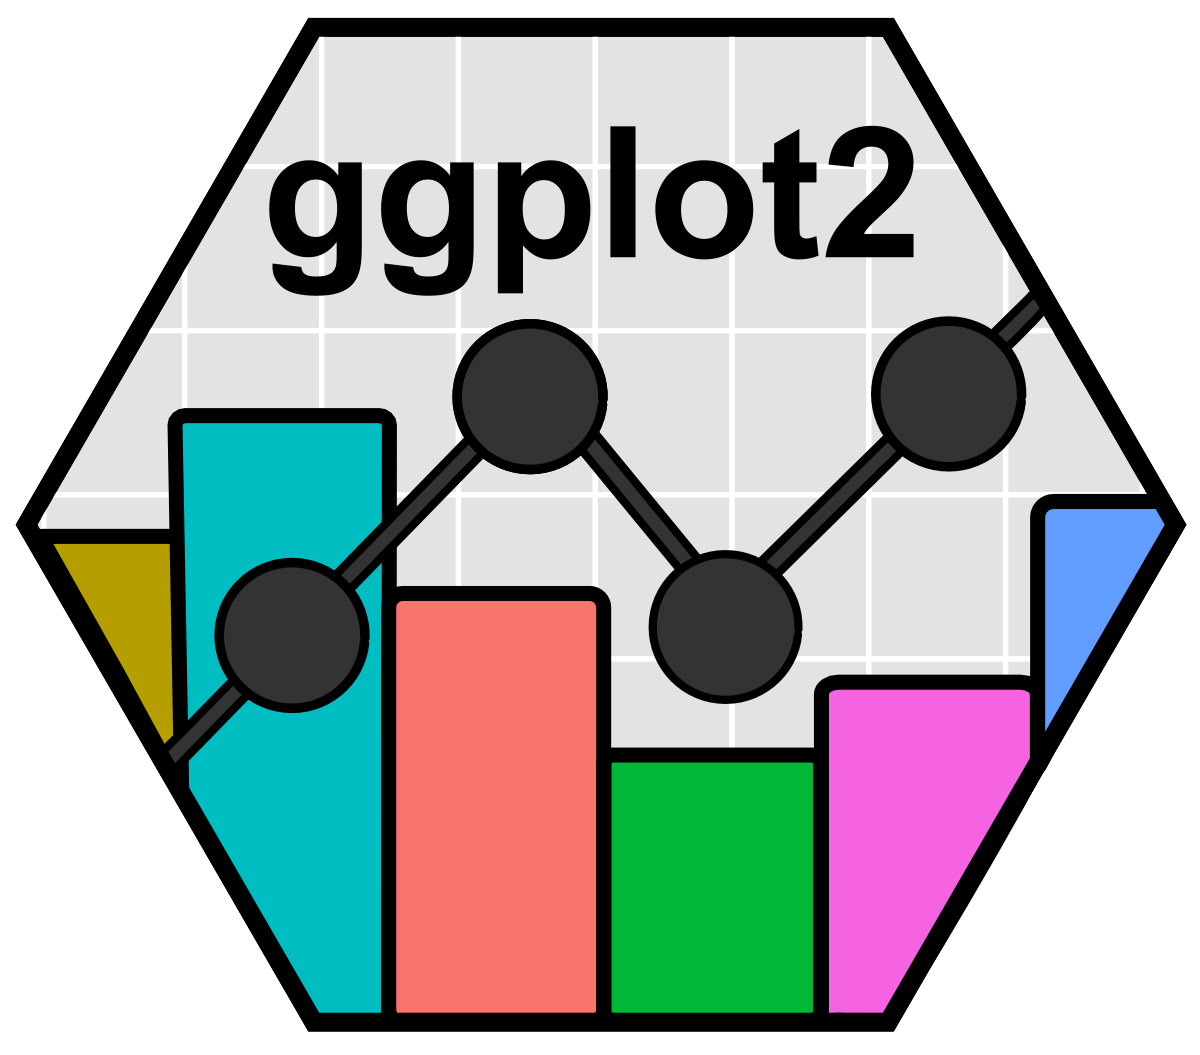</p>
</div></td>
<td style="text-align: center;"><div width="50.0%" data-layout-align="center">
<p>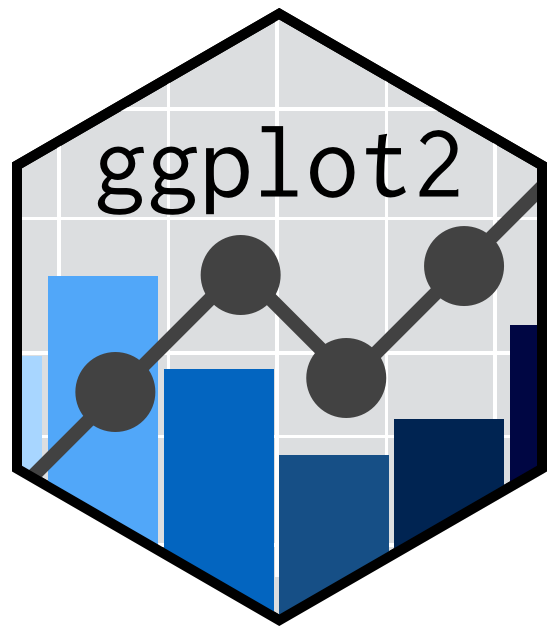</p>
</div></td>
</tr>
</tbody>
</table>

Figure 3: Two early versions of the ggplot2 hex logo. The second version was created in concert with Garrett Grolemund. I can’t find any record of who created the first, but I presume it was me given that I messed up the direction of the hexagon.

I love hex stickers as a community building tool: people can see your laptop, immediately recognise you as a member of the R community, and get a sense of what you use R for. I’ve heard many stories of people striking up a conversation with strangers just because they recognised the stickers. They also play a role akin to trading cards and <a href="#fig-hex-wall" class="quarto-xref">Figure 5</a> shows a collection of stickers that I’ve been given over the years. <a href="#fig-hex-wall" class="quarto-xref">Figure 5</a> shows the Posit conf’s hex wall, which is a popular place to take selfies.

<figure id="fig-hex-office">
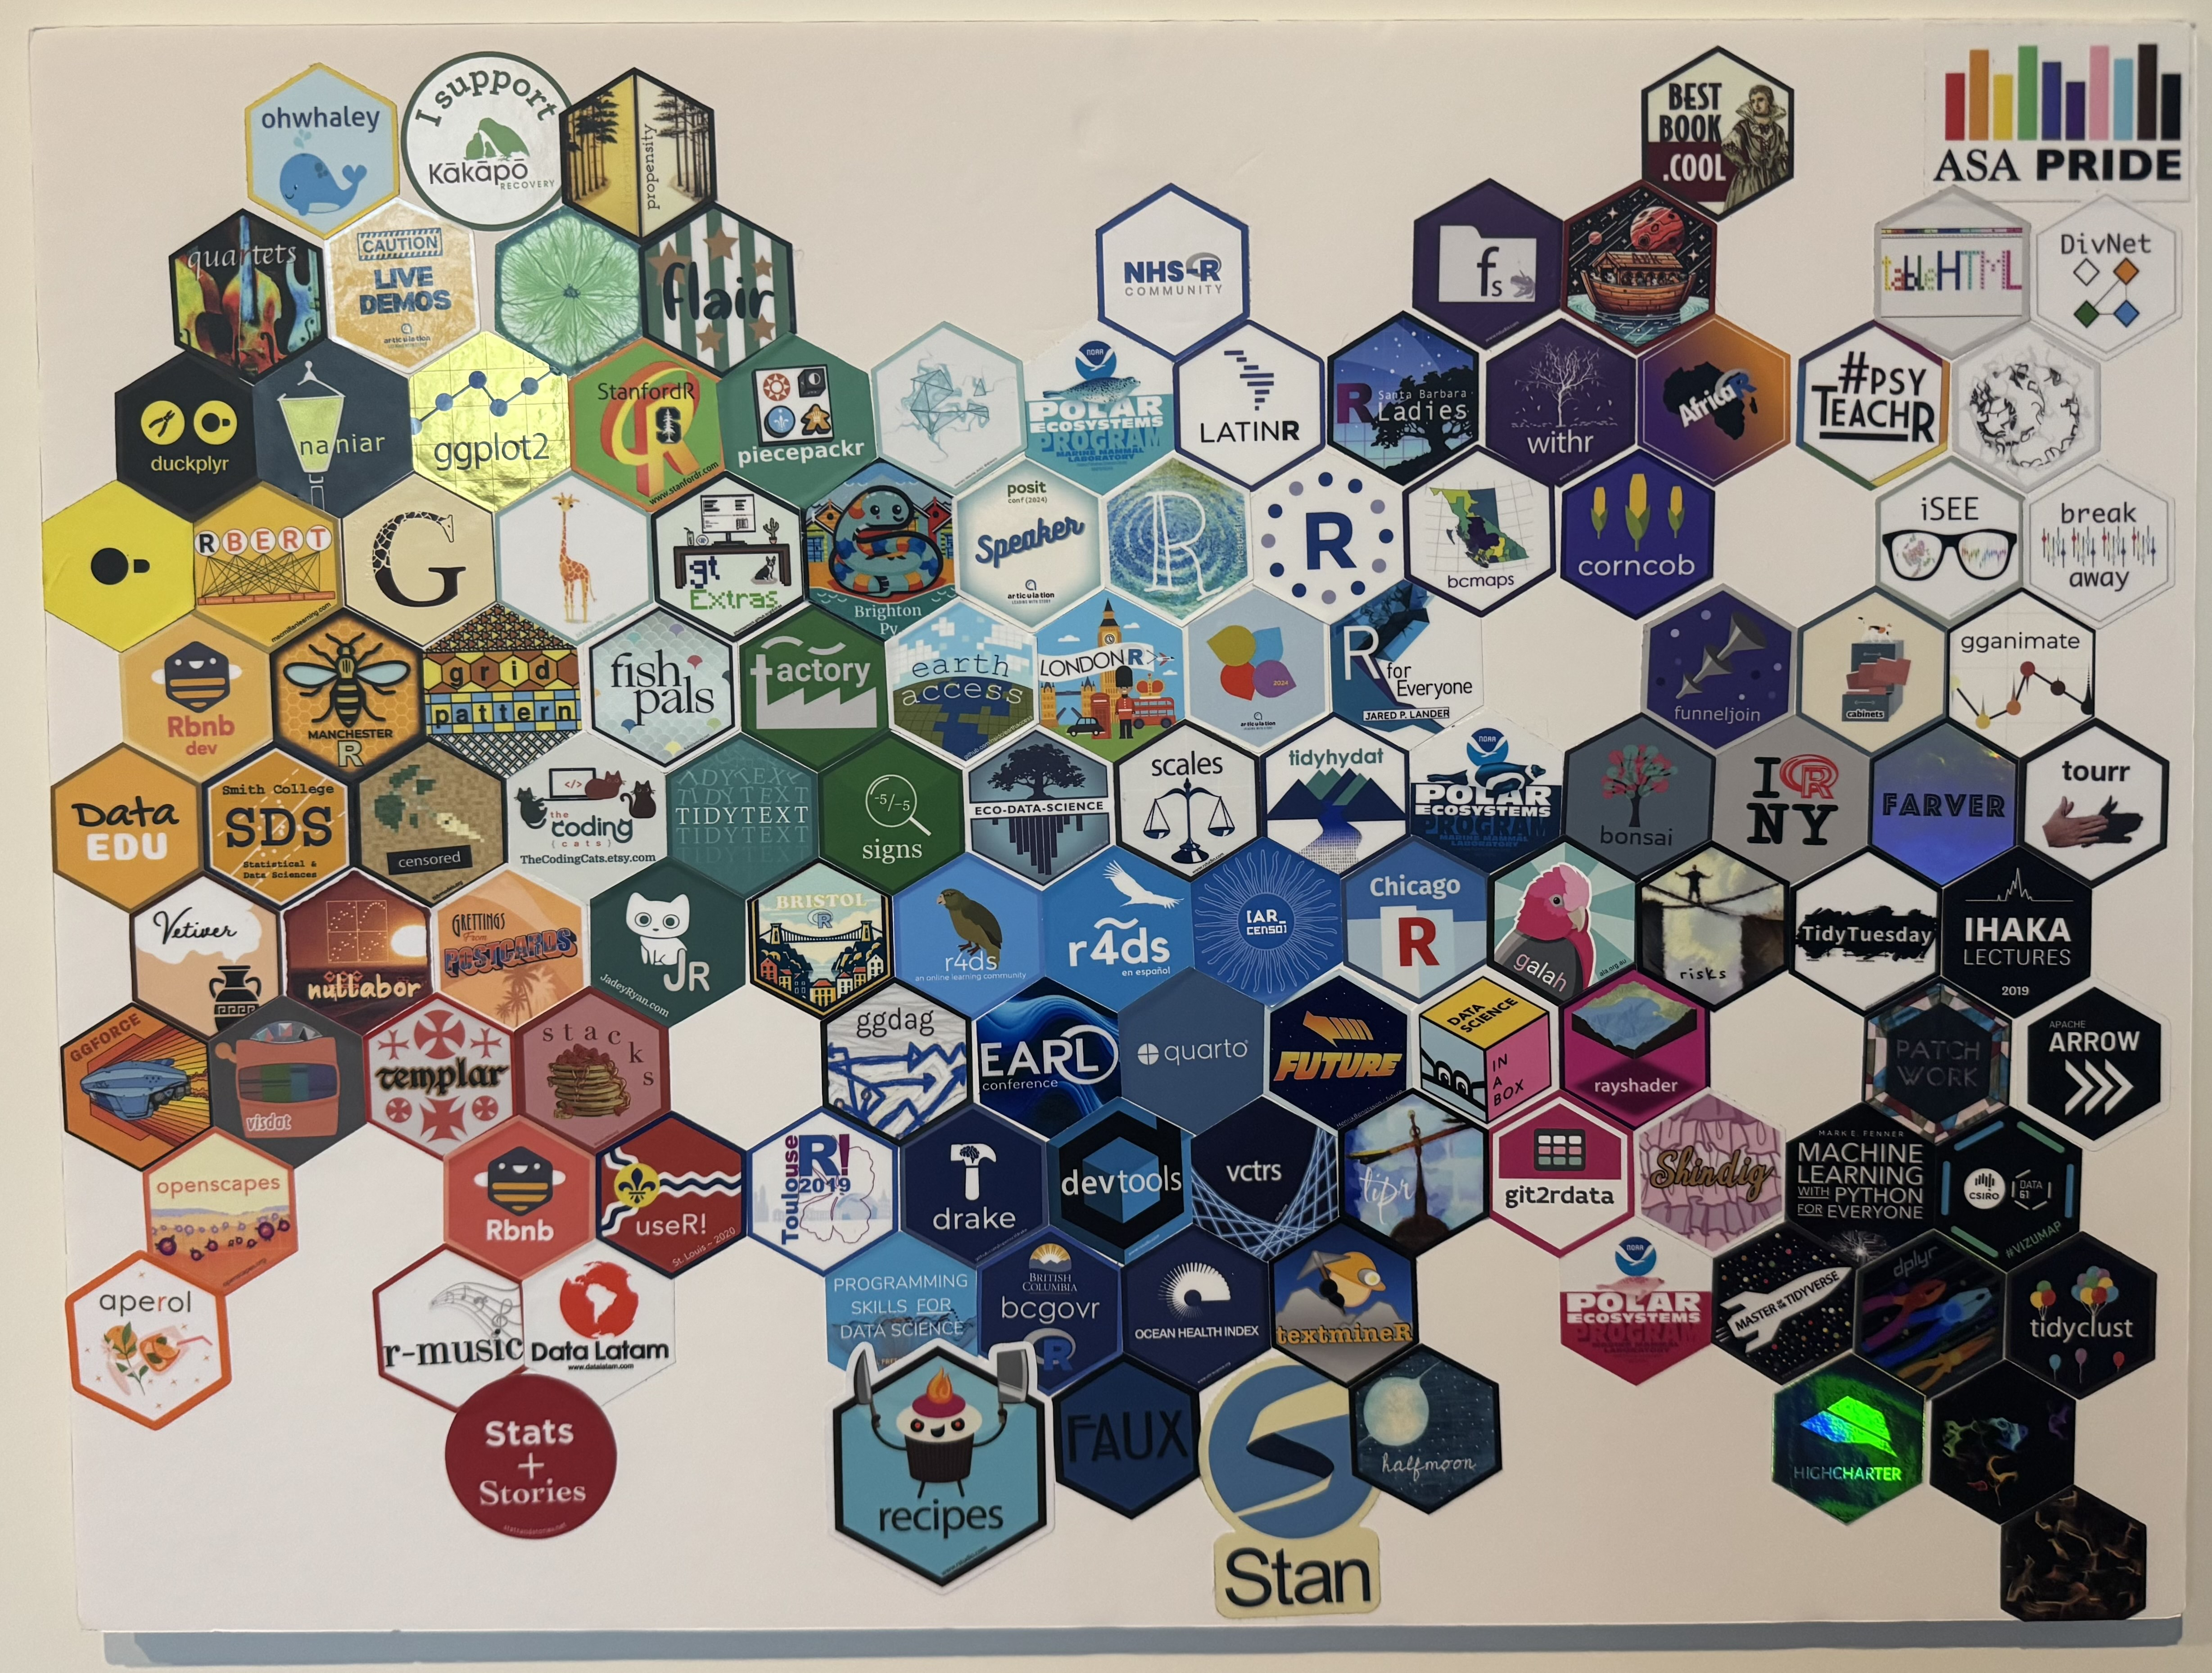
<figcaption>Figure 4: In my office I’ve made a display board with all the stickers that I’ve been gifted over multiple years.</figcaption>
</figure>

<figure id="fig-hex-wall">
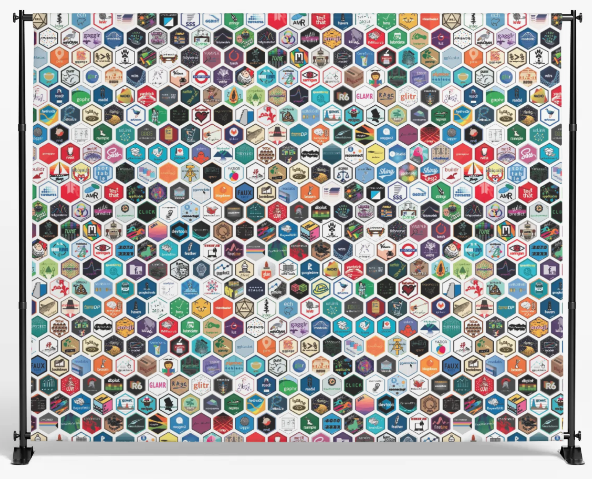
<figcaption>Figure 5: posit::conf() (and rstudio::conf() before) features a hex wall that’s a popular place to take photos.</figcaption>
</figure>

## The tidyverse team

The naming of the tidyverse coincided with the start of my team at RStudio, and the overarching journey from a project that was primarily developed by me to a project collaboratively owned by many people.

### The people

Current members of the tidyverse team are Lionel Henry, Jenny Bryan, Gábor Csárdi, Mine Cetinkaya-Rundel, Thomas Lin Pedersen, Davis Vaughan, George Stagg, and Teun Van den Brand. The tidymodels subteam (more on that below) is led by Max Kuhn and includes Hannah Frick, Simon Couch, and Emil Hvitfeldt.

Tidyverse team alumni are Jim Hester, Mara Averick, Romain Francois, Tracy Teal and Andy Teucher. Even these folks are no longer paid to work on the tidyverse, many of them still active community contributors and I consider all of them members of “team tidyverse”.

Posit also funded four ggplot2 summer interns: [Thomas Lin Pedersen](https://www.data-imaginist.com/posts/2016-10-31-becoming-the-intern/) (2016), [Kara Woo](https://www.tidyverse.org/blog/2017/09/ggplot2-internship/) (2017), [Dana Paige Seidel](https://www.danaseidel.com/MeetUpSlides) (2018), and [Dewey Dunnington](https://dewey.dunnington.ca/post/2019/a-summer-of-rstudio-and-ggplot2/) (2019). And there have been other paid contributors such as Kirill Muller, Oliver Gjoneski, Jeroen Ooms, and Charlie Gao.

[1] <https://github.com/max-mapper/hexbin/commits/gh-pages/hexagons/magrittr.png>

### The mission

The mission of the tidyverse team is broad: we want to make R the best environment for doing data science. We have nothing against other programming languages (and certainly use others where appropriate), but we love R, believe in it, and want to keep our efforts focused.

Our goal is not to just to write code, but to help people find out. This means that members of the tidyverse team are expected to contribute in many different ways including [writing blog posts](https://www.tidyverse.org/blog), writing books, speaking, teaching, and community building.

While tidyverse packages strive to provide a common core of tools that really help the most common 80% of problems encountered when analysing data. The remaining 20% of problems tend to be highly varied and we expect every analysis to use many other package. For this reason, we also strive to help every developer make their own high quality packages. You see this in books like [Advanced R](https://adv-r.hadley.nz) and [R packages](https://r-pkgs.org), but also the development of the devtools family of packages which aim to make it easier to build R packages. This suite of package has been very impactful on the practice of package development with ~9,000 packages using testthat for unit testing, ~16,000 using roxygen2 for documentation, and ~12,000 using pkgdown to make package websites.

Generally, we are a process oriented team, and because we strive to work as much in the open as possible, we do our best to write up our processes so that others can benefit from them. This work includes:

-   Our package release checklist (as implemented in `usethis::use_release_isse()`) ensures that we maximise the chances of successful CRAN submission by following a standard process. Our process grows as we discover new problems, and shrinks as we figure out how to automate manual steps away.

-   The [tidyverse style guide](https://style.tidyverse.org), probably the most commonly reference style guide in the R community, and used by organisations like Google.

-   We spend a lot of time reviewing code (both internally and externally) so we wrote up [code review guidelines](https://code-review.tidyverse.org) to keep our own work consistent, and to help new contributors know what to expect.

-   We are slowly working on an exposition of the [design principles](https://design.tidyverse.org) that guide the design of tidyverse APIs. This is helpful for us, because it makes it easier to remember design decisions and re-apply them the same way in multiple places, and also helps the community see reusable patterns that they can apply to their own code.

Our broad mission means that recently we have been spending less time on tidyverse packages and more time on broader data science efforts; I’ll come back to these at the end of this paper.

### tidymodels

Within the tidyverse team, the tidymodels team has a narrower mission: improving the tools data scientists need to fit (and trust) models in R. The tidymodels team started in late 2016 when Max Kuhn joined RStudio, after initial talks about how we could support statistical and ML modeling, talks which lead to the creation of the [recipes](https://recipes.tidymodels.org) package.

Max was the obvious choice to found this team because of his work on the caret package. caret provided functionality for basic predictive modeling tasks such as performance measures and resampling as well as a consistent user interface. Max’s idea was to create a more extensible framework that would integrate more advanced tools, such as more complex pre- and post-processing, censored regression models, and others. The resulting collection of packages was called tidymodels and heavily relied on the tidyverse syntax and the underlying tools being developed (e.g., non-standard evaluation, etc.).

tidymodels took a somewhat cheeky approach to naming. For one package that was close in spirit to caret, Max’s initial idea was to give it the code name “carrot” to confuse outside users. Hadley proposed “parsnip,” and this became the working name. However, eventually this name was codified by the community and was retained. The tidymodels team has been composed of between two and six people over the years, and its [GitHub repository](https://github.com/tidymodels) currently contains over 40 packages for modeling and predicting data.

## Tidyverse community

The tidyverse is certainly not just me, and isn’t even just the team of people paid to work on it full time. It’s primarily the community of people outside of Posit who use it and contribute to its development in many ways, big and small. The community is the reason we work so hard. Tremendously rewarding to see people using the tidyverse to analyse data in so many different domains.

I also enjoy watching people grow as contributors, possibly starting off filing issues, learning how to create good reprexes, contributing documentation improvements and bug fixes, answer other people’s questions, propopsing new designs and thoughtfully critiquing existing designs, brainstorming better names. The tidyverse wouldn’t be a fraction as good as it is today without the many ways that the community has helped make it better.

We make a yearly in-person attempt to support contributors through the tidyverse developer days in [2024](https://www.tidyverse.org/blog/2024/04/tdd-2024/), [2020](https://www.tidyverse.org/blog/2020/02/tidy-dev-days-2020/) and [2019](https://www.tidyverse.org/blog/2019/04/tidyverse-dev-day-at-user-2019/). These were disrupted by Covid, but we hope to run annually. They are a really fun time for the tidyverse team, and designed to get as many community members as possible to contribute.

### Social media

The precursors to the tidyverse were greatly aided by discussions on mailing lists, like r-help. But these mailing lists were of the era where the majority of R user had PhD’s in statistics and they were infamous for rude responses and general unkindness to new learners. I started a ggplot2 mailing list in 2008, explicitly to provide a more friendly place to ask questions.

The

stackoverflow. Mike Driscoll.

#rstats twitter.

After twitter was sold and renamed to X, a lot of the R community moved away. For the last couple of years, it’s felt like

But as of late 2024, felt like bluesky has taken off.

### R for Data Science

I’m a big believer in the power of books to get big ideas into the hands of the community. Equally important to me that the books be available to all, regardless of their ability to pay. That’s why all the books I work on have a dual production model: a free online version that I 100% produce and a paid print version made in conjunction with a book publisher.

The book most closely associated with the tidyverse is R for data science (2017, 2023). The first edition was written in collaboration with Garrett Grolemund, and the second with Mine Çentinkaya Rundel. Very impactful work.

Many translations. I’m particularly enamored of the community translations which now include Spanish, Portugese, Turkish, and Italian. But commercial translations also included Russian, Polish, Japanese, Chinese (traditional) and Chinese (simplified).

### Package authors

Most external contributors tend to provide a few small (but meaningful!) contributions. A select few external contributors end up contributing much time and effort over the course of many years. We recognise these contributors by officially making them package authors. This formally includes them in package metadata (so they are explicitly acknowledged on CRAN, on the package website, and in the pacakge citation) and gives them write access to the GitHub repository. You can learn more about the rights and responsibilities of authors (and other roles) in our [tidyverse governance model](https://github.com/tidyverse/tidyups/blob/main/004-governance.md).

Many package authors are academics, and since the currency of academics is citation, in 2019 we made the effort to write Wickham et al. ([2019](#ref-tidyverse-welcome)). This makes it easy to cite the tidyverse as a whole[1] (instead of having to cite individual packages) and also gives academic credit to tidyverse maintainers who might benefit from it: Mara Averick, Jennifer Bryan, Winston Chang, Lucy McGowan, Romain François, Garrett Grolemund, Alex Hayes, Lionel Henry, Jim Hester, Max Kuhn, Thomas Pedersen, Evan Miller, Stephan Bache, Kirill Müller, Jeroen Ooms, David Robinson, Dana Seidel, Vitalie Spinu, Kohske Takahashi, Davis Vaughan, Claus Wilke, Kara Woo, and Hiroaki Yutani. This paper has been cited ~16,000 times as of January 2025.

Since we’ve published that paper we’ve gained a few new maintainers including Maximilian Girlich (tidyr, dbplyr), Mark Fairbanks (dtplyr), Ryan Dickerson (dtplyr), Olivier Roy (pkgdown), Danny Smith (haven), Maxim Shemanarev (ragg), and Teun van den Brand (ggplot2).

## Maintaining the tidyverse

For the last few years, the tidyverse has felt pretty mature to me. It’s certainly not perfect, but it feels like we have all of the main pieces in place, and much of the remaining work is grinding down the minor inconsistencies between them. Overall, the goal of the tidyverse is now consoliation and maintainence, not growth. There have been three major initiatives that have helped us create a more cohesive and streamlined experience for everyone using it.

-   In 2019, we created a formal policy as to [which versions of R we support](https://www.tidyverse.org/blog/2019/04/r-version-support/): the current version, the devel version, and the previous four versions. Coupled with R’s yearly release cycle, this means we support 5 years worth of R versions. This policy is important because many large enterprises use older versions of R, but still want to be able to use the latest and greatest package versions. Supporting 5 years worth of R versions only increases our maintenance burden slightly. The major downside is that we can rely on new R features only five years after they’re implemented.

-   In 2020 and early 2021, <https://www.tidyverse.org/blog/2021/02/lifecycle-1-0-0/>. 20-maintenace rstudio::global(2020). During the tidyverse’s early life, there were a lot of changes as we iterated towards the right solutions in many different domains. We got the message from the community that the pace of change was too high, and so we we firmed up our policies around deprecating and removing tidyverse functions. We also introduced a new lifecycle phase called “superseded”; these are functions that we no longer recommend for new code but because of their widespread usage we have no plans to remove (but they will no longer be actively developed).

-   In late 2021, thanks to the hard work on Mara Averick, we [relicensed most tidyverse packages to MIT](https://www.tidyverse.org/blog/2021/12/relicensing-packages/). This increased consistency across tidyverse packages, making it easier for legally conservative organisations to convince themselves their was little risk to using the tidyvrse.

What does the future hold? When I think about the tidyverse today, there’s only one sweeping change that I’d like to make, and that’s introducing *editions*. You would deliberately opt-in to an edition by running code like `tidyverse::edition(2025)`, stating that you want to adopt our recommended practices as of 2025. Editions would generally change defaults and disable superseded functions and arguments, ensuring that you’re using our latest API recommendations. Editions makes it possible for us to change behaviour that we now believe is suboptimal without breaking existing code. You can continue to use the latest package versions (ensuring that you get new features and bug fixes) but you can increase the edition when its convenient for you to spend some time refactoring your code. For example, we could use editions to change the default colour schemes in ggplot2, which we now know could be improved.

## What’s next?

As the tidyverse becomes more mature, the places where the tidyverse team spends our innovation energy have started to change. Broadly, the mission of the team is to make R more awesome for doing data science, and we’re willing to go whereever this takes us. Currently there are three new areas that we are exploring as a team:

-   **Positron**. [Positron](https://github.com/posit-dev/positron) is a new IDE for data science, produced by the same team that created RStudio. The tidyverse team has been deeply involved in the R tooling. This is exciting because it gives us the skills for tighter integrations in the future. Code where coding makes sense, and use an graphical user interface where that is a better fit for the task.

-   **R in production**. If you’re working in industry, most tasks aren’t completed by writing a one-off report. Instead you will typically produce an artifact that’s run repeatedly on another machine. This is the challenge of putting your code in production, which in my opinion at least currently suffers from a thousand paper cuts. From getting your database authentication to work to ensuring that you’re using exactly the same dependencies both in development and deployment, and over time, there are a lot of rough edges that you have to overcome that are not directly related to doing data science. I’m convinced that we can make this better.

-   **LLMs for data science**. Pretty clear now that LLMs are going to have a transformative impact on how we do data science. We see them as invaluable assistants for the data scientist, not replacements. Allow you to get help where you need it and automate fiddly annoying tasks. Also provides a new tool kit creating tidy data frames from unstructured data, which seems likely to considerably expand the reach of the tidyverse to new types of data. Still very early days, but one initiative is the [ellmer package](https://ellmer.tidyverse.org) which lets you call LLMs from R.

Grolemund, Garrett, and Hadley Wickham. 2011. “Dates and Times Made Easy with <span class="nocase">lubridate</span>.” *Journal of Statistical Software* 40 (3): 1–25. <https://www.jstatsoft.org/v40/i03/>.

Sarkar, Deepayan. 2008. *Lattice: Multivariate Data Visualization with r*. New York: Springer. <http://lmdvr.r-forge.r-project.org>.

Wickham, Hadley. 2014. “Tidy Data.” *Journal of Statistical Software* 59 (10): 1–23. <https://doi.org/10.18637/jss.v059.i10>.

Wickham, Hadley, Mara Averick, Jennifer Bryan, Winston Chang, Lucy D’Agostino McGowan, Romain François, Garrett Grolemund, et al. 2019. “Welcome to the Tidyverse.” *Journal of Open Source Software* 4 (43): 1686. <https://doi.org/10.21105/joss.01686>.

Wilkinson, Leland. 2012. *The Grammar of Graphics*. Springer.

[1] We include some advice on citing packages in our blog post advertising the paper: <https://www.tidyverse.org/blog/2019/11/tidyverse-1-3-0/>.